In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [211]:
df_raw = pd.read_csv('data/usd.csv', usecols=range(1,11))
nyc_df = df_raw[df_raw['Club']=='NYC'].reset_index(drop=True)
nyc_df

,Player,Club,MINS,POS,player,club,value,age,join_age,usd
0,Valentin Castellanos,NYC,1341,F,V. Castellanos,New York City FC,€4.00m,22.0,20.0,4720000.0
1,Jesus Medina,NYC,1495,M,J. Medina,New York City FC,€3.00m,23.0,20.0,3540000.0
2,Anton Tinnerholm,NYC,2001,D,A. Tinnerholm,New York City FC,€2.50m,30.0,26.0,2360000.0
3,Ismael Tajouri-Shradi,NYC,670,F,I. Tajouri-ShradiI,New York City FC,€1.00m,26.0,23.0,1180000.0
4,Keaton Parks,NYC,1733,M,K. Parks,New York City FC,€3.00m,23.0,22.0,3540000.0
5,Alexander Callens,NYC,1934,D,A. Callens,New York City FC,€1.80m,28.0,24.0,1180000.0
6,Maximiliano Moralez,NYC,875,M,M. Moralez,New York City FC,€1.50m,34.0,29.0,1180000.0
7,Tony Rocha,NYC,51,M,T. Rocha,New York City FC,€450Th.,27.0,25.0,472000.0
8,Gudmundur Thorarinsson,NYC,683,D,G. Thórarinsson,New York City FC,€800Th.,28.0,27.0,472000.0
9,James Sands,NYC,1409,M,J. Sands,New York City FC,€2.50m,20.0,16.0,2360000.0


In [200]:
sorted(df_raw['Club'].unique())

['ATL',
 'ATX',
 'CHI',
 'CIN',
 'CLB',
 'COL',
 'DAL',
 'DC',
 'HOU',
 'LA',
 'LAFC',
 'MCF',
 'MIA',
 'MIN',
 'MTL',
 'NE',
 'NSH',
 'NYC',
 'ORL',
 'PHI',
 'POR',
 'RBNY',
 'RSL',
 'SEA',
 'SJ',
 'SKC',
 'TOR',
 'VAN']

In [286]:
def plot_age(df, color1, color2, color3=None):
    
    if not color3:
        color3=color1
    a = 0.5 # color alpha
    a_grid = 0.4 # grid alpha
    # font size
    titlef = 24
    tickf = 18
    annof = 14

    club = df.loc[0, 'club']

    my_dpi=96
    plt.figure(figsize=(1400/my_dpi, 800/my_dpi), dpi=my_dpi)
    plt.rcParams["font.family"] = "Arial"

    ax=plt.gca()
    # ax.get_xaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.scatter(df['age'], df['MINS'], color=color1, zorder=100, s=60,
                label='Age Now (As of Mar 5, 2021)')
    for i in range(len(df)):
        x = [df.loc[i,'join_age'], df.loc[i,'age']]
        y = [df.loc[i,'MINS'], df.loc[i,'MINS']]
        plt.plot(x, y, color=color1, linewidth=4, alpha=0.7)

    plt.plot(x, y, color=color1, linewidth=4, label="Age Since Joined", alpha=a)

    for i, txt in enumerate(df['player']):
        plt.annotate(txt, (df.loc[i,'age']-.8, df.loc[i,'MINS']+25), fontsize=annof)

    ax.axvspan(25, 29, alpha=a, color=color2, label='Peak Age')


    # img=plt.imread('img/nyfc_logo.jpg')
    # frame_height=125
    # x_start=36
    # y_start=1000
    # plt.imshow(img, aspect='auto', extent=[x_start,x_start+frame_height,y_start,y_start+frame_height])


    plt.grid(alpha=a_grid)
    plt.title(f"{club} Squad Age Profile\nMajor League Soccer 2020", fontsize=titlef, fontweight='bold', loc='left')
    plt.figtext(0.125, 0.932, f"{club}", fontsize=titlef, fontweight='bold', color=color3)

    plt.ylabel("Minutes Played", fontsize=tickf)
    plt.xlabel("Age", fontsize=tickf)
    plt.xticks(range(int(df['join_age'].min())-1, int(df['age'].max())+1,2), fontsize=annof)
    plt.yticks(fontsize=14)
    ax.set_ylim(ymin=-40)
    ax.set_xlim(xmin=int(df['join_age'].min())-.5)
    plt.legend(bbox_to_anchor=(1.01, 0.15), loc='upper left', fontsize=14)
    plt.savefig(f'img/{"".join(club.split())}_age.png', bbox_inches='tight')
    plt.show()

In [288]:
# NYC FC
df = nyc_df
color1 = '#041E42' # for line
color2 = '#F15524' # for peak age
color3 = '#6CACE4' # for title

In [244]:
# Columbus Crew
df = df_raw[df_raw['Club']=='CLB'].reset_index(drop=True)
color1 = '#231F20' # for line
color2 = '#FEF200' # for peak age
color3 = '#FEF200' # for title

In [246]:
# Philadelphia Union
df = df_raw[df_raw['Club']=='PHI'].reset_index(drop=True)
color1 = '#002D55' # for line
color2 = '#B38707' # for peak age
color3 = '#B38707' # for title

In [284]:
# Seattle Sounders
df = df_raw[df_raw['Club']=='SEA'].reset_index(drop=True)
color1 = '#236192' # for line
color2 = '#658D1B' # for peak age
color3 = '#658D1B' # for title

In [268]:
# Sporting Kansas City
df = df_raw[df_raw['Club']=='SKC'].reset_index(drop=True)
color1 = '#93B1D7' # for line
color2 = '#A0A1A5' # for peak age
color3 = '#93B1D7' # for title

In [207]:
# Toronto FC
df = df_raw[df_raw['Club']=='TOR'].reset_index(drop=True)
color1 = '#AB1E2D' # for line
color2 = '#A3AAAD' # for peak age
color3 = '#AB1E2D' # for title

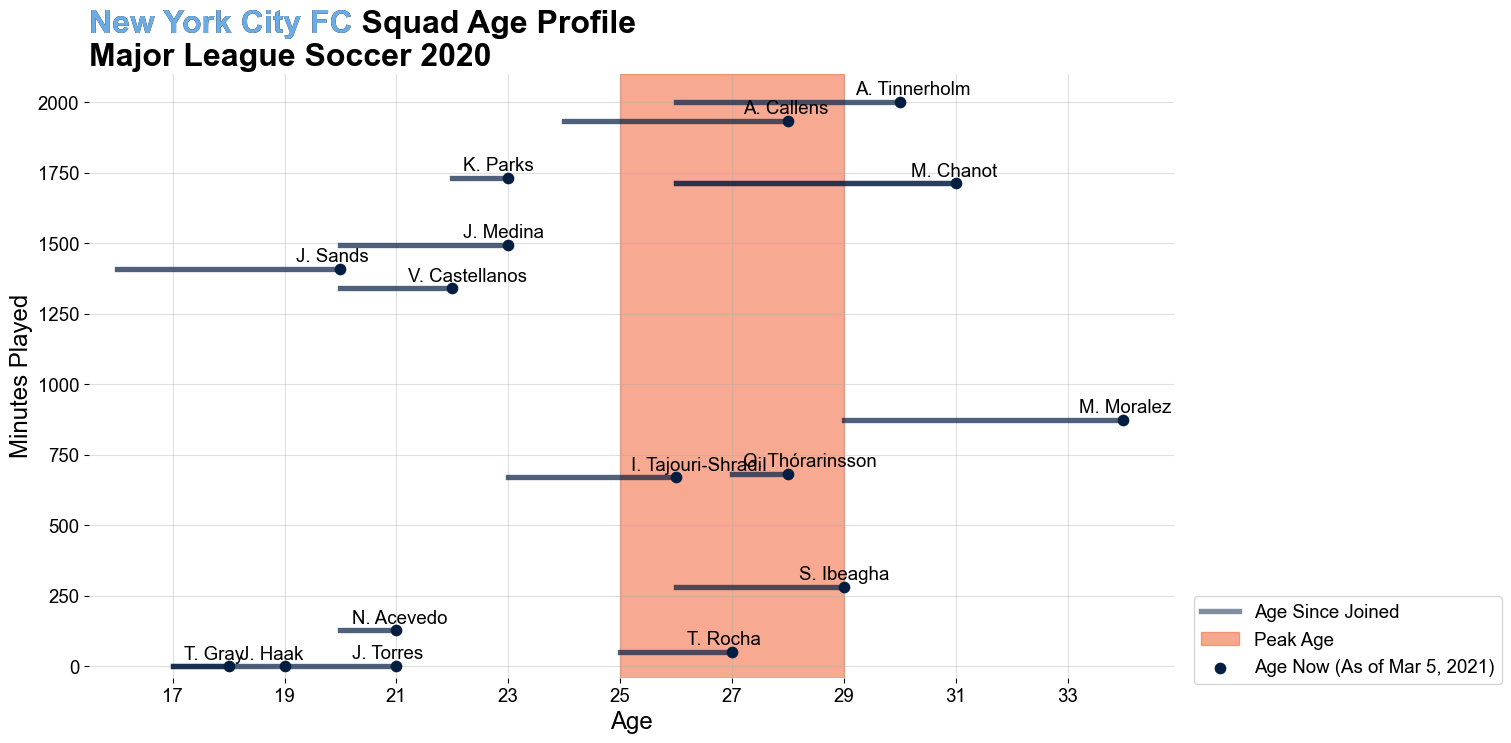

In [289]:
plot_age(df, color1, color2, color3)

(array([12., 37., 52., 78., 66., 66., 67., 51., 26., 13.,  7.]),
 array([16., 18., 20., 22., 24., 26., 28., 30., 32., 34., 36., 38.]),
 <BarContainer object of 11 artists>)

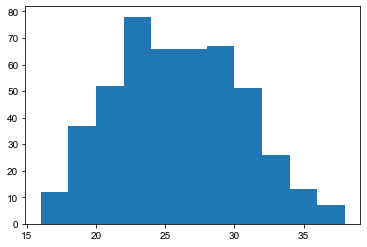

In [179]:
plt.hist(df_raw['age'], bins=11)

In [ ]:
from scipy.stats import norm

data = np.random.normal(loc=5.0, scale=2.0, size=1000)
mean,std=norm.fit(data)

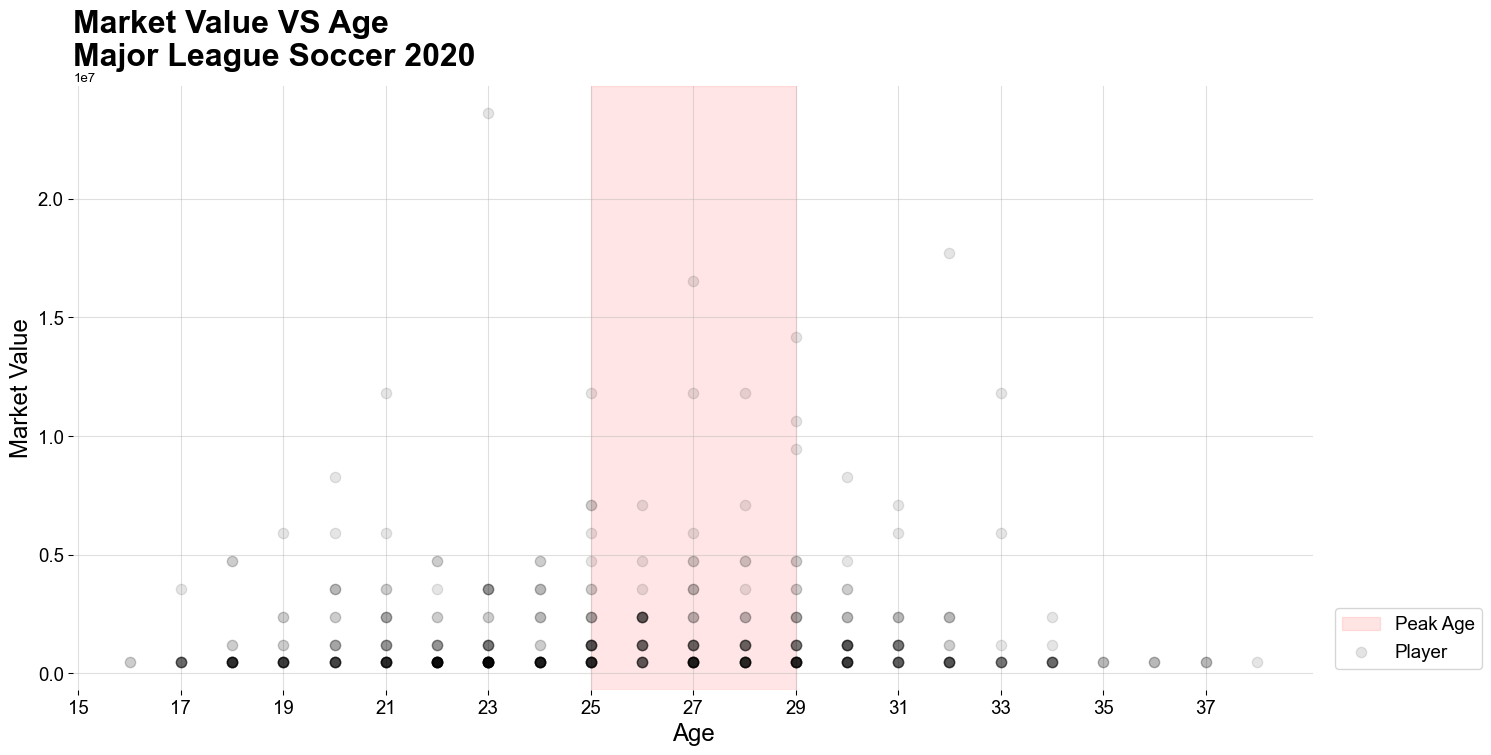

In [242]:
df = df_raw
a = 0.1 # color alpha
a_grid = 0.4 # grid alpha
# font size
titlef = 24
tickf = 18
annof = 14

my_dpi=96
plt.figure(figsize=(1600/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.rcParams["font.family"] = "Arial"

ax=plt.gca()
# ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.scatter(df['age'], df['usd'], color='k', zorder=100, s=60, label='Player', alpha=.1)

ax.axvspan(25, 29, alpha=a, color='r', label='Peak Age')

plt.grid(alpha=a_grid)
plt.title("Market Value VS Age\nMajor League Soccer 2020", fontsize=titlef, y=1.02,
          fontweight='bold', loc='left')
plt.ylabel("Market Value", fontsize=tickf)
plt.xlabel("Age", fontsize=tickf)
plt.xticks(range(15, 39,2), fontsize=annof)
plt.yticks(fontsize=14)
# ax.set_yscale('log')
# ax.set_ylim(ymin=-40)
# ax.set_xlim(xmin=15.5)
plt.legend(bbox_to_anchor=(1.01, 0.15), loc='upper left', fontsize=14)
plt.savefig(f'img/{"".join(club.split())}_age.png', bbox_inches='tight')
plt.show()

In [277]:
int(df['join_age'].min())

15

where is the peak age?
1. market value
2. rank
3. xG or other